# 서울시 전체 매매 실거래 평균 구하기

In [14]:
import pandas as pd

transaction_kr = pd.read_excel("../data/아파트_규모별_매매_실거래_평균가격_20240118135715.xlsx", engine='openpyxl')
#transaction_kr.head()

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
transaction_seoul = transaction_kr.iloc[5:10, :]
#transaction_seoul

# 불필요한 텍스트 column 삭제
df = transaction_seoul.iloc[:,2:]
#df

# 년도별(column) 아파트 전체면적 가격 평균
mean = df.mean()
mean.to_csv("../data/yjs/01_Seoul_MeanPrice_yjs.csv")
mean.head()


2019.01     864.38
2019.02     876.68
2019.03     928.56
2019.04    1018.08
2019.05    1100.20
dtype: float64

In [16]:
# max값을 가지는 index값 추출
mean.idxmax()

'2022.04'

Text(0, 0.5, '평균 매매가(만원)')

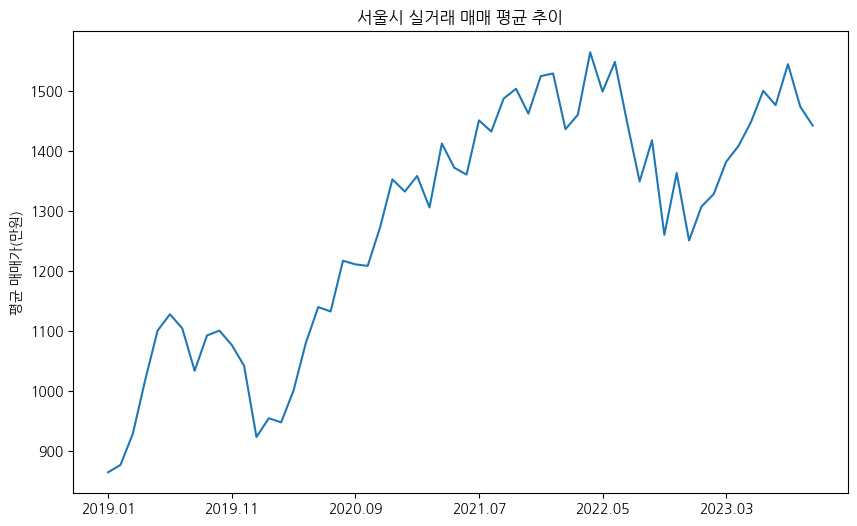

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

mean.plot(figsize=(10,6))
plt.title("서울시 실거래 매매 평균 추이")
plt.ylabel("평균 매매가(만원)")


# 구별 실거래 매매 평균 구하기 2021.01.01 ~ 2021.12.31

In [19]:
import pandas as pd

transaction_21_gu = pd.read_csv("../data/mean_price_seoul/2021년_서울_아파트(매매)_실거래가_지번주소.csv", encoding='euc-kr' ,header=15)
#transaction_21_gu.head()

In [20]:
transaction_21_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43465 entries, 0 to 43464
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       43465 non-null  object 
 1   번지        43460 non-null  object 
 2   본번        43460 non-null  float64
 3   부번        43460 non-null  float64
 4   단지명       43465 non-null  object 
 5   전용면적(㎡)   43465 non-null  float64
 6   계약년월      43465 non-null  int64  
 7   계약일       43465 non-null  int64  
 8   거래금액(만원)  43465 non-null  object 
 9   층         43465 non-null  int64  
 10  건축년도      43465 non-null  int64  
 11  도로명       43465 non-null  object 
 12  해제사유발생일   1479 non-null   float64
 13  등기신청일자    43465 non-null  object 
 14  거래유형      43465 non-null  object 
 15  중개사소재지    43465 non-null  object 
dtypes: float64(4), int64(4), object(8)
memory usage: 5.3+ MB


In [21]:
# '거래금액(만원) column int데이터로 변환 및 콤마 제거
transaction_21_gu['거래금액(만원)'] = transaction_21_gu['거래금액(만원)'].str.replace(",","").astype('int64')
#transaction_21_gu

In [22]:
transaction_21_gu.info()
#transaction_21_gu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43465 entries, 0 to 43464
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       43465 non-null  object 
 1   번지        43460 non-null  object 
 2   본번        43460 non-null  float64
 3   부번        43460 non-null  float64
 4   단지명       43465 non-null  object 
 5   전용면적(㎡)   43465 non-null  float64
 6   계약년월      43465 non-null  int64  
 7   계약일       43465 non-null  int64  
 8   거래금액(만원)  43465 non-null  int64  
 9   층         43465 non-null  int64  
 10  건축년도      43465 non-null  int64  
 11  도로명       43465 non-null  object 
 12  해제사유발생일   1479 non-null   float64
 13  등기신청일자    43465 non-null  object 
 14  거래유형      43465 non-null  object 
 15  중개사소재지    43465 non-null  object 
dtypes: float64(4), int64(5), object(7)
memory usage: 5.3+ MB


# '시군구'column에서 "구" 값을 추출하여 새로운 column 생성

In [23]:
transaction_21_gu['구'] = transaction_21_gu['시군구'].str.split().str[1]
#transaction_21_gu['동'] = transaction_21_gu['시군구'].str[6:]
#transaction_21_gu.head()

In [24]:
transaction_21_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43465 entries, 0 to 43464
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       43465 non-null  object 
 1   번지        43460 non-null  object 
 2   본번        43460 non-null  float64
 3   부번        43460 non-null  float64
 4   단지명       43465 non-null  object 
 5   전용면적(㎡)   43465 non-null  float64
 6   계약년월      43465 non-null  int64  
 7   계약일       43465 non-null  int64  
 8   거래금액(만원)  43465 non-null  int64  
 9   층         43465 non-null  int64  
 10  건축년도      43465 non-null  int64  
 11  도로명       43465 non-null  object 
 12  해제사유발생일   1479 non-null   float64
 13  등기신청일자    43465 non-null  object 
 14  거래유형      43465 non-null  object 
 15  중개사소재지    43465 non-null  object 
 16  구         43465 non-null  object 
dtypes: float64(4), int64(5), object(8)
memory usage: 5.6+ MB


In [25]:
# '구'단위로 묶어서 평균

#transaction_21_gu_mean = transaction_21_gu.groupby("동")["거래금액(만원)"].mean()
transaction_21_gu_mean = transaction_21_gu.groupby("구")["거래금액(만원)"].mean()
transaction_21_gu_mean.info()

<class 'pandas.core.series.Series'>
Index: 25 entries, 강남구 to 중랑구
Series name: 거래금액(만원)
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 400.0+ bytes


In [26]:
# '구'의 개수
len(transaction_21_gu_mean.index)

25

In [27]:
transaction_21_gu_mean = transaction_21_gu_mean.sort_values(axis=0, ascending=False)

In [28]:
transaction_21_gu_mean.to_csv("../data/yjs/02_2021_Seoul_price_yjs.csv")
transaction_21_gu_mean

구
강남구     207144.448980
서초구     205079.347411
용산구     199105.796031
송파구     154346.286920
성동구     144546.348684
광진구     119721.447721
마포구     116794.593090
동작구     111730.379377
양천구     103119.236354
영등포구    101948.649895
강동구      93626.194037
종로구      92944.505495
서대문구     90762.613573
중구       90108.240260
성북구      83987.360912
강서구      79163.403564
동대문구     77543.257840
은평구      73154.587302
관악구      72948.668005
노원구      67273.907743
강북구      66786.311230
중랑구      64493.791641
구로구      62036.694633
금천구      59569.069767
도봉구      58481.827441
Name: 거래금액(만원), dtype: float64

Text(0, 0.5, '평균 매매가(만원)')

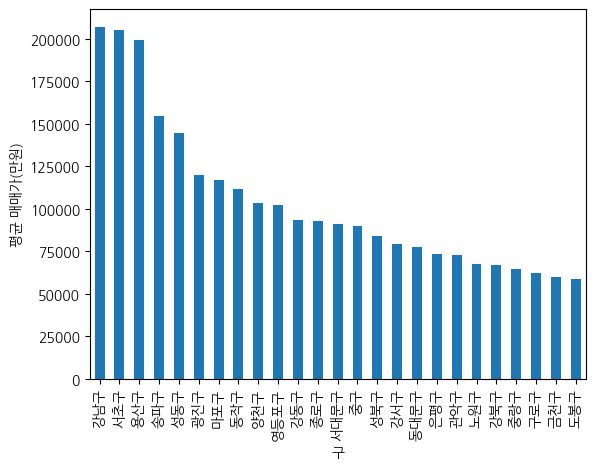

In [29]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

transaction_21_gu_mean.plot.bar(x='구')

plt.ylabel('평균 매매가(만원)')

# 서울시 행정동 지도위에 "구"별 가격을 시각화 해보자

In [12]:
import folium
import json

seoul = folium.Map(location=[37.55, 126.98], zoom_start=11)

geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open('../data/02. skorea_municipalities_geo_simple.json', encoding='utf-8'))
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [13]:
folium.Choropleth(
    geo_data=geo_data,
    data=transaction_21_gu_mean,
    columns=['구'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name = '2021년 매매 평균가'
).add_to(seoul)


# 지도에 '구' 이름 표시

seoul_district = pd.read_csv('../data/gu_name.csv' ,  encoding='cp949')

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,30),icon_anchor=(0,0),
                              html=f"""<div style="font-family: arial; color: black">{text}</div>""")
                      ).add_to(seoul)
        

seoul